## Dicoding NLP Submission

Dataset used: <a href="https://www.kaggle.com/datasets/danofer/dbpedia-classes">DBPedia</a>  
By: Putu Andika Tedja Permana

In [22]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import re
import nltk

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Read Data CSV

In [2]:
df = pd.read_csv('DBPEDIA_train.csv', encoding='utf-8')
df

,text,l1,l2,l3
0,"William Alexander Massey (October 7, 1856 – Ma...",Agent,Politician,Senator
1,Lions is the sixth studio album by American ro...,Work,MusicalWork,Album
2,"Pirqa (Aymara and Quechua for wall, hispaniciz...",Place,NaturalPlace,Mountain
3,Cancer Prevention Research is a biweekly peer-...,Work,PeriodicalLiterature,AcademicJournal
4,The Princeton University Chapel is located on ...,Place,Building,HistoricBuilding
...,...,...,...,...
240937,Charlie Thompson is a prominent journalist in ...,Agent,Person,Journalist
240938,The Northerly Stakes is a Perth Racing Group 3...,Event,Race,HorseRace
240939,HC Empor Rostock is a team handball club from ...,Agent,SportsTeam,HandballTeam
240940,University of Surabaya (UBAYA) is a university...,Agent,EducationalInstitution,University


### Data Exploratory

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240942 entries, 0 to 240941
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    240942 non-null  object
 1   l1      240942 non-null  object
 2   l2      240942 non-null  object
 3   l3      240942 non-null  object
dtypes: object(4)
memory usage: 7.4+ MB


In [4]:
df.dtypes

text    object
l1      object
l2      object
l3      object
dtype: object

### Data Preprocessing

In [5]:
# We will use the l1 as label, so we can drop the l2 and l3 columns
df.drop(['l2', 'l3'], axis=1, inplace=True)
df

,text,l1
0,"William Alexander Massey (October 7, 1856 – Ma...",Agent
1,Lions is the sixth studio album by American ro...,Work
2,"Pirqa (Aymara and Quechua for wall, hispaniciz...",Place
3,Cancer Prevention Research is a biweekly peer-...,Work
4,The Princeton University Chapel is located on ...,Place
...,...,...
240937,Charlie Thompson is a prominent journalist in ...,Agent
240938,The Northerly Stakes is a Perth Racing Group 3...,Event
240939,HC Empor Rostock is a team handball club from ...,Agent
240940,University of Surabaya (UBAYA) is a university...,Agent


In [6]:
# Count how many label or class this data has
df['l1'].nunique()

9

In [7]:
replace_by_space_regex = re.compile('[/(){}\[\]\|@,;]')
bad_symbols_regex = re.compile('[^0-9a-z #+_]')
stopwords = set(nltk.corpus.stopwords.words('english'))

def clean_text(text):
    """
        Function to clean text
        
        text: a string
        
        return: modified initial string
    """
    text = text.lower()
    text = replace_by_space_regex.sub(' ', text)
    text = bad_symbols_regex.sub('', text)
    text = text.replace('x', '')
    text = ' '.join(word for word in text.split() if word not in stopwords) # remove stopwords from text
    return text

In [8]:
df['text'] = df['text'].apply(clean_text)
df['text'] = df['text'].str.replace('\d+', '', regex=True)

#### Label Encoding
For label encoding, we will use one hot encoding

In [9]:
one_hot = OneHotEncoder(handle_unknown='ignore')

In [10]:
one_hot_df = pd.DataFrame(one_hot.fit_transform(df[['l1']]).toarray())
one_hot_df.columns=one_hot.get_feature_names_out()

In [11]:
one_hot_df.head()

,l1_Agent,l1_Device,l1_Event,l1_Place,l1_Species,l1_SportsSeason,l1_TopicalConcept,l1_UnitOfWork,l1_Work
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
new_df = df.join(one_hot_df)
new_df.drop('l1', axis=1, inplace=True)
new_df.head()

,text,l1_Agent,l1_Device,l1_Event,l1_Place,l1_Species,l1_SportsSeason,l1_TopicalConcept,l1_UnitOfWork,l1_Work
0,william aleander massey october march unit...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,lions sith studio album american rock band bla...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,pirqa aymara quechua wall hispanicized spellin...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,cancer prevention research biweekly peerreview...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,princeton university chapel located university...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### Separate training data and label to X and y

In [13]:
X = new_df['text'].values
y = new_df.drop('text', axis=1).values

In [14]:
# Example training data
X[0]

'william aleander massey october   march   united states senator nevada born trumbull county ohio moved parents edgar county illinois  attended common schools union christian college merom indiana indiana asbury university de pauw university greencastle indiana studied law admitted bar  commencing practice sullivan indiana moved san diego california  nevada  prospected mined later took practice law elko nevada massey member nevada assembly   district attorney   justice nevada supreme court   resigned moved reno nevada resumed practice law appointed republican united states senate fill vacancy caused death george nion governor tasker oddie massey served senate july   january   defeated election remainder nions term democrat key pittman senate chairman committee mines mining time senate resumed practice law reno died train near litchfield nevada march  interment mountain view cemetery reno'

In [15]:
# Example label
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Train Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Initialize Tokenizer and Sequences

In [17]:
tokenizer = Tokenizer(num_words=1000, oov_token='x')
tokenizer.fit_on_texts(X_train)
 
training_sequence = tokenizer.texts_to_sequences(X_train)
test_sequence = tokenizer.texts_to_sequences(X_test)
 
padded_training = pad_sequences(training_sequence, maxlen=100, padding='post') 
padded_test = pad_sequences(test_sequence, maxlen=100, padding='post')

### Modelling

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=1000, output_dim=256),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(9, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 256)         256000    
                                                                 
 spatial_dropout1d (SpatialD  (None, None, 256)        0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 9)                 585       
                                                        

#### Define Callbacks

In [19]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2, min_delta=0.0001),
             tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)]

### Training

In [20]:
num_epochs = 10
history = model.fit(padded_training, y_train, epochs=num_epochs, 
                    validation_data=(padded_test, y_test), callbacks=callbacks, verbose=1)

Epoch 1/10
6024/6024 [==============================] - 92s 15ms/step - loss: 0.6700 - accuracy: 0.7877 - val_loss: 0.1813 - val_accuracy: 0.9419 - lr: 0.0010
Epoch 2/10
6024/6024 [==============================] - 91s 15ms/step - loss: 0.1603 - accuracy: 0.9496 - val_loss: 0.1295 - val_accuracy: 0.9569 - lr: 0.0010
Epoch 3/10
6024/6024 [==============================] - 90s 15ms/step - loss: 0.1258 - accuracy: 0.9590 - val_loss: 0.1243 - val_accuracy: 0.9595 - lr: 0.0010
Epoch 4/10
6024/6024 [==============================] - 91s 15ms/step - loss: 0.1086 - accuracy: 0.9641 - val_loss: 0.1169 - val_accuracy: 0.9613 - lr: 0.0010
Epoch 5/10
6024/6024 [==============================] - 92s 15ms/step - loss: 0.0970 - accuracy: 0.9676 - val_loss: 0.1158 - val_accuracy: 0.9625 - lr: 0.0010
Epoch 6/10
6024/6024 [==============================] - 92s 15ms/step - loss: 0.0870 - accuracy: 0.9704 - val_loss: 0.1205 - val_accuracy: 0.9622 - lr: 0.0010
Epoch 7/10
6024/6024 [========================

### Plotting

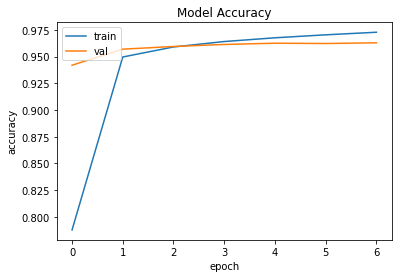

In [23]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

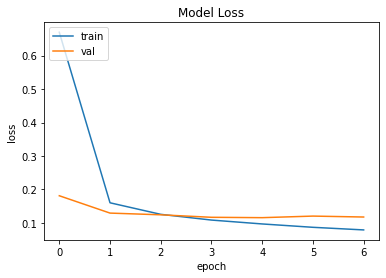

In [24]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()